# Principle Component Analysis

**Principle component analysis (PCA)** is a dimensionality reduction technique that finds a feature space such that all features are uncorrelated with each other. Furthermore, the first feature is a linear combination of the observed features that maximizes the variance without "magnifying" those features effects. The second feature maximizes variance when the effect of the first feature has been removed from the dataset, and so on, so each feature "explains" a diminishing amount of variation in the original dataset. Dimensionality is thus reduced by choosing a smaller number of features found by PCA that account for most of the variation in the original dataset.

## Performing PCA

In this notebook I demonstrate dimensionality reduction with PCA on the features of the Boston housing price dataset. First I load in the dataset.

In [1]:
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA    # The object responsible for performing PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
boston_obj = load_boston()
data = boston_obj.data
data[:5, :]

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
          0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
          6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
          2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
          4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
          7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
          9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   7.18500000e+00,
          6.11000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.92830000e+02,
          4.03000000e+00],
       [  3.23700000e-02,   0.00000000e+00,   2.18000000e+00,
          0.00000000e+00,   4.58000000e-01,   6.99800000e+00,
          4.58000000e+01,   6.06220000e+00,   3.000

In [3]:
pca = PCA(n_components=2)    # A two-dimensional representation of the dataset
new_data = pca.fit_transform(data)
new_data[:5]

array([[-119.81821283,   -5.56072403],
       [-168.88993091,   10.11419701],
       [-169.31150637,   14.07855395],
       [-190.2305986 ,   18.29993274],
       [-190.13340306,   16.09537059]])

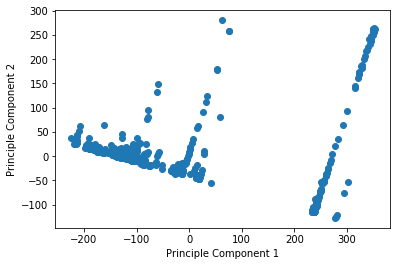

In [4]:
plt.scatter(x=new_data[:, 0], y=new_data[:, 1])
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

## Choosing the Number of Components

The elbow method (seen with $k$-means clustering) is often used to decide how many principle components to use with PCA. One can always "explain" more of the variance in the original dataset by increasing the number of principle components kept but this would defeat the purpose of dimensionality reduction. Thus we look for an "elbow" in the plot of explained variance to suggest a number of princiiple components to use.

The function below can construct such a plot.

In [5]:
import numpy as np

In [6]:
def explained_var_plot(data, max_components):
    """Plots the amount of variance explained by different number of components kept"""
    explained_var = PCA(n_components=max_components).fit(data).explained_variance_ratio_
    plt.plot(np.arange(max_components) + 1, 1 - np.cumsum(explained_var), marker='o')

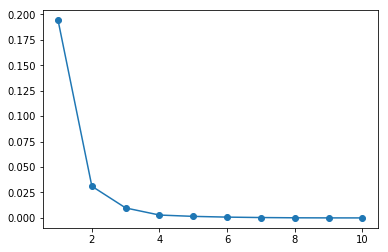

In [7]:
explained_var_plot(data, 10)

This plot would suggest that a three-dimensional representation of the data should explain a reasonable amount of the variance in the dataset. (We found a two-dimensional representation.)